# WRF-Topografik Domain

## Gerekli Modülleri İmport Edelim

In [41]:
import xarray as xr
from netCDF4 import Dataset
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER , LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from wrf import getvar, interpline, CoordPair, xy_to_ll, ll_to_xy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


## Verileri Açalım
Verileri hem Xarray dataset hem de netCDF4 Dataset olarak açalım (İkisi de lazım.)

In [20]:
# veriyi açalım
dt1 = xr.open_dataset(r'C:\Users\USER\Desktop\ankara\geo_em.d01.nc')
d1 = Dataset(r'C:\Users\USER\Desktop\ankara\geo_em.d01.nc')

dt2 = xr.open_dataset(r'C:\Users\USER\Desktop\ankara\geo_em.d02.nc')
d2 = Dataset(r'C:\Users\USER\Desktop\ankara\geo_em.d02.nc')

dt3 = xr.open_dataset(r'C:\Users\USER\Desktop\ankara\geo_em.d03.nc')
d3 = Dataset(r'C:\Users\USER\Desktop\ankara\geo_em.d03.nc')

## Lon/Lat/Height
Longitude Latitude ve Height değişkenlerini oluşturalım

In [21]:
# lon lat ve lu_index verisini tanımlayalım
lat1 = dt1['XLAT_M']
lon1 = dt1['XLONG_M']
hgt1 = dt1['HGT_M']

lat2 = dt2['XLAT_M']
lon2 = dt2['XLONG_M']
hgt2 = dt2['HGT_M']

lat3 = dt3['XLAT_M']
lon3 = dt3['XLONG_M']
hgt3 = dt3['HGT_M']

## Shape Dosyaları
Shape dosyalarını daha sonra harita üzerinde çizmek üzere açalım .shp uzantılı

In [22]:
# shapefileların pathlerini tanımlayalım ilki il ikincisi ilçe
shape_path = r'C:\Users\USER\Documents\BitirmeProjesiKutay\Shapefile_Turkey\turkey_administrativelevels0_1_2\tur_polbnda_adm1.shp'
shape_path2 = r'C:\Users\USER\Documents\BitirmeProjesiKutay\Shapefile_Turkey\turkey_administrativelevels0_1_2\tur_polbnda_adm2.shp'

## WRF XY TO LL
WRF xy koordinatlarını ve projeksiyonu'nu kullanarak domainlerin köşe koordinatlarını bulalım

In [23]:
sol_alt1 = xy_to_ll(d1, 0, 0).values
sol_ust1 = xy_to_ll(d1, 0, 74).values
sag_alt1 = xy_to_ll(d1, 74, 0).values
sag_ust1 = xy_to_ll(d1, 74, 74).values

sol_alt2 = xy_to_ll(d2, 0, 0).values
sol_ust2 = xy_to_ll(d2, 0, 107).values
sag_alt2 = xy_to_ll(d2, 107, 0).values
sag_ust2 = xy_to_ll(d2, 107, 107).values

sol_alt3 = xy_to_ll(d3, 0, 0).values
sol_ust3 = xy_to_ll(d3, 0, 200).values
sag_alt3 = xy_to_ll(d3, 200, 0).values
sag_ust3 = xy_to_ll(d3, 200, 200).values

## Görselleştirme
Veriyi görselleştirelim içinde adımlar yazılı

<ipython-input-43-fa696f942cb8>:123: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig(r'C:\Users\USER\Desktop\ankara\ankara_height{}.jpeg',
<ipython-input-43-fa696f942cb8>:123: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  plt.savefig(r'C:\Users\USER\Desktop\ankara\ankara_height{}.jpeg',


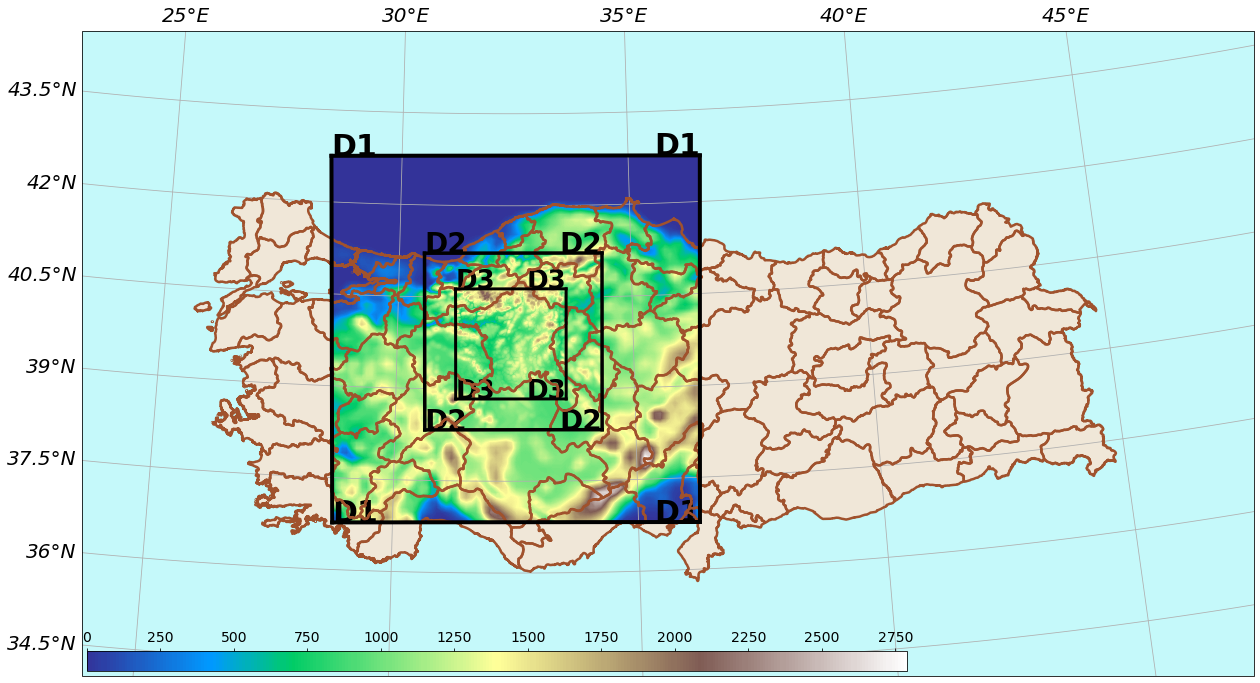

In [43]:
# Create a figure
# -------------------------------------------------------
#projeksiyon (wrf'tan sağlanan)
cart_proj = cartopy.crs.LambertConformal( 32.406708, 39.744022)

# -------------------------------------------------------
#figüre yaratalım
fig = plt.figure(figsize=(21,19))
ax = plt.axes(projection=cart_proj)

# -------------------------------------------------------
# haritada hangi lat ve lon aralığını görselleştirelim?
ax.set_extent([24, 47, 34, 44])

# -------------------------------------------------------
# lat ve lon gridlerini haritaya ekleyelim
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=False, x_inline=False, y_inline=False )
gl.yformatter = LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER
gl.xlabels_top = True
gl.ylabels_right = False
gl.ylabels_left = True
gl.xlabels_down = False
gl.xlabel_style = {'size': 20, 'color':'k', 'style':'italic', 'rotation':0}
gl.ylabel_style = {'size': 20, 'color':'k', 'style':'italic', 'rotation':0}
        
# -------------------------------------------------------
# cartopy kullanarak shapefileleri okuyalım
shp_file_il = cartopy.io.shapereader.Reader(shape_path)
shp_file_ilce = cartopy.io.shapereader.Reader(shape_path2)
    
# -------------------------------------------------------
# il sınırları
shape_feature_il = ShapelyFeature(shp_file_il.geometries(),
                                    cartopy.crs.PlateCarree(), edgecolor='none', linewidths=0.9,
                                    facecolor='#f0e7d8', zorder=1.5)
shape_feature_il_copy = ShapelyFeature(shp_file_il.geometries(),
                                    cartopy.crs.PlateCarree(), edgecolor='sienna', linewidths=2.5,
                                     facecolor='none', zorder=3)

# -------------------------------------------------------
#ilçe sınırları
shape_feature_ilce = ShapelyFeature(shp_file_ilce.geometries(),
                                    cartopy.crs.PlateCarree(), edgecolor='sienna', linewidths=0.5,
                                     facecolor='none', zorder=3)

# -------------------------------------------------------
# shapefileları feature olarak axisimize ekleyelim    
ax.add_feature(shape_feature_il) 
ax.add_feature(shape_feature_il_copy)
#ax.add_feature(shape_feature_ilce)

# -------------------------------------------------------
# lu_indexi çizelim harita üzerine    
height = np.arange(0, 2800, 10)
mesh1 = ax.contourf(lon1.values[0], lat1.values[0], hgt1.values[0], height, cmap='terrain',
                 transform=cartopy.crs.PlateCarree(), zorder=2)

mesh2 = ax.contourf(lon2.values[0], lat2.values[0], hgt2.values[0], height, cmap='terrain',
                 transform=cartopy.crs.PlateCarree(), zorder=2.1)

mesh3 = ax.contourf(lon3.values[0], lat3.values[0], hgt3.values[0], height, cmap='terrain',
                 transform=cartopy.crs.PlateCarree(), zorder=2.2)

# -------------------------------------------------------
#show the cross section area in the second axis map

#mavi
fc = ax.set_facecolor('#c5f9fa')

ax.text(sol_alt1[1], sol_alt1[0], 'D1', color='k', weight='bold', fontsize=30 , transform = cartopy.crs.PlateCarree())
ax.text(sol_ust1[1], sol_ust1[0], 'D1', color='k', weight='bold', fontsize=30 , transform = cartopy.crs.PlateCarree())
ax.text(sag_ust1[1], sag_ust1[0], 'D1', color='k', weight='bold', fontsize=30 , transform = cartopy.crs.PlateCarree(),
        horizontalalignment='right')
ax.text(sag_alt1[1], sag_alt1[0], 'D1', color='k', weight='bold', fontsize=30 , transform = cartopy.crs.PlateCarree(),
        horizontalalignment='right')

#d2
ax.text(sol_alt2[1], sol_alt2[0], 'D2', color='k', weight='bold', fontsize=28 , transform = cartopy.crs.PlateCarree())
ax.text(sol_ust2[1], sol_ust2[0], 'D2', color='k', weight='bold', fontsize=28 , transform = cartopy.crs.PlateCarree())
ax.text(sag_ust2[1], sag_ust2[0], 'D2', color='k', weight='bold', fontsize=28 , transform = cartopy.crs.PlateCarree(),
        horizontalalignment='right')
ax.text(sag_alt2[1], sag_alt2[0], 'D2', color='k', weight='bold', fontsize=28 , transform = cartopy.crs.PlateCarree(),
        horizontalalignment='right')

#d3
ax.text(sol_alt3[1], sol_alt3[0], 'D3', color='k', weight='bold', fontsize=26 , transform = cartopy.crs.PlateCarree())
ax.text(sol_ust3[1], sol_ust3[0], 'D3', color='k', weight='bold', fontsize=26 , transform = cartopy.crs.PlateCarree())
ax.text(sag_ust3[1], sag_ust3[0], 'D3', color='k', weight='bold', fontsize=26 , transform = cartopy.crs.PlateCarree(),
        horizontalalignment='right')
ax.text(sag_alt3[1], sag_alt3[0], 'D3', color='k', weight='bold', fontsize=26 , transform = cartopy.crs.PlateCarree(),
        horizontalalignment='right')

#line d1
ax.plot([sol_alt1[1], sol_ust1[1],],[sol_alt1[0], sol_ust1[0],], c='k', linewidth=4, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sol_ust1[1], sag_ust1[1],],[sol_ust1[0], sag_ust1[0],], c='k', linewidth=4, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sag_ust1[1], sag_alt1[1],],[sag_ust1[0], sag_alt1[0],], c='k', linewidth=4, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sag_alt1[1], sol_alt1[1],],[sag_alt1[0], sol_alt1[0],], c='k', linewidth=4, transform = cartopy.crs.PlateCarree(), zorder=10)

#line d2
ax.plot([sol_alt2[1], sol_ust2[1],],[sol_alt2[0], sol_ust2[0],], c='k', linewidth=3.5, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sol_ust2[1], sag_ust2[1],],[sol_ust2[0], sag_ust2[0],], c='k', linewidth=3.5, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sag_ust2[1], sag_alt2[1],],[sag_ust2[0], sag_alt2[0],], c='k', linewidth=3.5, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sag_alt2[1], sol_alt2[1],],[sag_alt2[0], sol_alt2[0],], c='k', linewidth=3.5, transform = cartopy.crs.PlateCarree(), zorder=10)

#line d3
ax.plot([sol_alt3[1], sol_ust3[1],],[sol_alt3[0], sol_ust3[0],], c='k', linewidth=3, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sol_ust3[1], sag_ust3[1],],[sol_ust3[0], sag_ust3[0],], c='k', linewidth=3, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sag_ust3[1], sag_alt3[1],],[sag_ust3[0], sag_alt3[0],], c='k', linewidth=3, transform = cartopy.crs.PlateCarree(), zorder=10)
ax.plot([sag_alt3[1], sol_alt3[1],],[sag_alt3[0], sol_alt3[0],], c='k', linewidth=3, transform = cartopy.crs.PlateCarree(), zorder=10)

# -------------------------------------------------------
#colorbar ekleyelim belirli özellikleri tanımlayarak
cbaxes = inset_axes(ax, width="70%", height="3%", loc=3) 
cb = plt.colorbar(mesh1, cax=cbaxes, pad=0.01, shrink=0.75, orientation = 'horizontal',
             ticks = np.arange(0, 2850, 250))
cbaxes.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=14, labelcolor='black', color='black' )


# -------------------------------------------------------
#save figure
plt.savefig(r'C:\Users\USER\Desktop\ankara\ankara_height{}.jpeg',
                  bbox_inches='tight', optimize=True, progressive=True, dpi=200)